In [138]:
'''
The goal for this notebook is to find out the times it is appropriate to display a particular ad to ensure that the ad will
be clicked each time it pops up. We are going to build a keras sequential model to predict the adclicks ensuring that we get a 
minimum of 70% accuracy

'''

'\nThe goal for this notebook is to find out the times it is appropriate to display a particular ad to ensure that the ad will\nbe clicked each time it pops up. We are going to build a keras sequential model to predict the adclicks ensuring that we get a \nminimum of 70% accuracy\n\n'

In [139]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [140]:
# read the dataset
path_to_csv = r'C:\Users\user\Downloads\My-Projects\adclick_prediction\ad_click_dataset.csv'

ad_click = pd.read_csv(path_to_csv)

#check the dataset
ad_click.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [141]:
#check the info
ad_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [142]:
'''
We are dealing with 10,000 records. There are some missing values we have to handle. We have to ensure data type validity
for each variable, drop irrelevant features.

'''

'\nWe are dealing with 10,000 records. There are some missing values we have to handle. We have to ensure data type validity\nfor each variable, drop irrelevant features.\n\n'

In [143]:
# subset rrelevant features
ad_click = ad_click[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']]

# check the data
ad_click.head()

,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,NaN,Male,Desktop,Top,NaN,NaN,1
2,41.0,Non-Binary,NaN,Side,Education,Night,1
3,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [144]:
# check the missing values
ad_click.isna().sum()

age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [145]:
'''
There is a significant number of missing values. Dropping would result in loss of a lot of data. We would have to impute
these missing values using appropriate imputing techniques. We would check the distribution of each feature and see which 
which technique to apply.
'''

'\nThere is a significant number of missing values. Dropping would result in loss of a lot of data. We would have to impute\nthese missing values using appropriate imputing techniques. We would check the distribution of each feature and see which \nwhich technique to apply.\n'

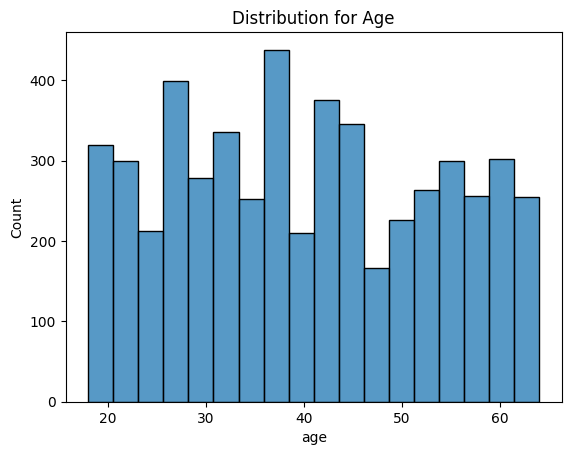

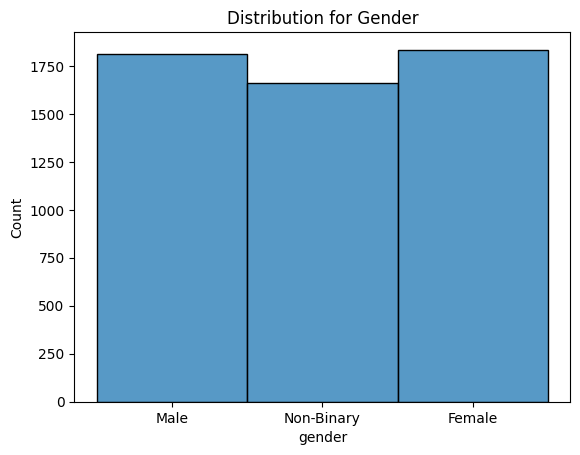

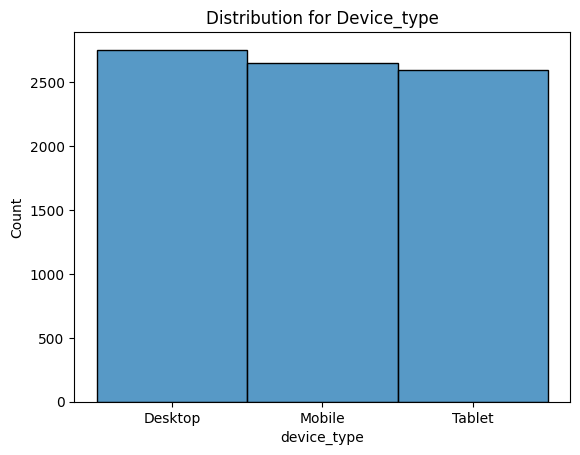

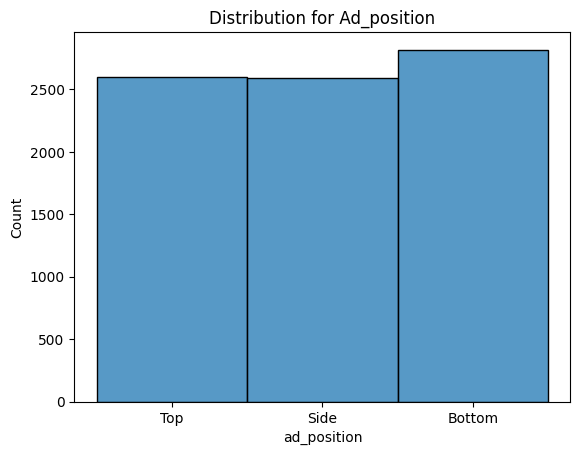

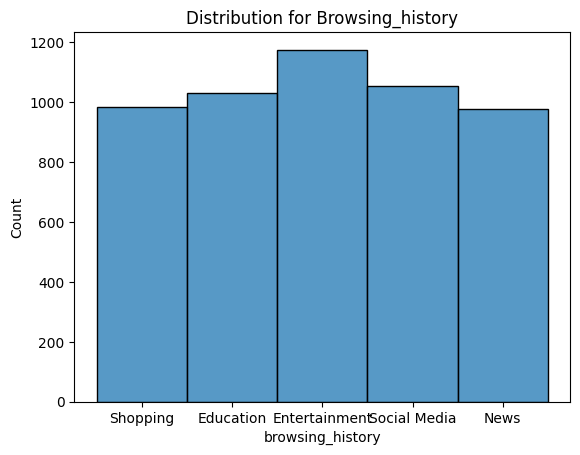

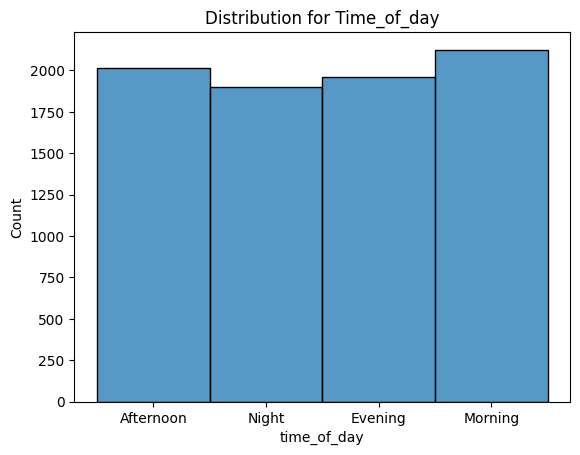

In [146]:
cols_to_plot = ['age','gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']

#loop to plot the columns
for col in cols_to_plot:
    sns.histplot(x=col, data= ad_click, kde= False)
    plt.title(f'Distribution for {col.capitalize()}')
    plt.xlabel(f'{col}')
    
    plt.show()

In [147]:
'''
From the above plots, it is unclear what summary statistic we should use to impute missing values in our age column.
Since the other colums are of object types, we need to use the mode to impute missing values:
    For Gender, the male and female class has the highest count hence we will impute our missing values randomly with both classes.
    For device type, browsing history, ad_position and time_of_day we are going to use the mode to represent these classes.
'''

'\nFrom the above plots, it is unclear what summary statistic we should use to impute missing values in our age column.\nSince the other colums are of object types, we need to use the mode to impute missing values:\n    For Gender, the male and female class has the highest count hence we will impute our missing values randomly with both classes.\n    For device type, browsing history, ad_position and time_of_day we are going to use the mode to represent these classes.\n'

In [148]:
# check the summary statistics
ad_click.describe()

,age,click
count,5234.000000,10000.000000
mean,40.197363,0.650000
std,13.126420,0.476993
min,18.000000,0.000000
25%,29.000000,0.000000
50%,39.500000,1.000000
75%,52.000000,1.000000
max,64.000000,1.000000


In [149]:
'''
The mean is affected by outliers however in this case the age feature has no outlier. Hence the mean serves as a better statistic instead of
the median to impute missing values in our age feature. From this descriptive statistic, we will use the mean to missing values.
'''

'\nThe mean is affected by outliers however in this case the age feature has no outlier. Hence the mean serves as a better statistic instead of\nthe median to impute missing values in our age feature. From this descriptive statistic, we will use the mean to missing values.\n'

In [150]:
#impute missing age values
mean = 40.0
ad_click['age'] = np.where(ad_click['age'].isna(), mean, ad_click['age'])

In [151]:
'''
Thinking critically, some people may decide to keep their gender confidential because they might be in some other class other than
male and female. In lieu of this, we decided to impute missing values with non-binary.  
'''

'\nThinking critically, some people may decide to keep their gender confidential because they might be in some other class other than\nmale and female. In lieu of this, we decided to impute missing values with non-binary.  \n'

In [152]:
#imputing missing values for gender
ad_click['gender'] = np.where(ad_click['gender'].isna(), 'Non-Binary', ad_click['gender'])

In [153]:
#imputing the rest using the mode
cols_to_impute = ['device_type', 'ad_position', 'browsing_history', 'time_of_day']

for col in cols_to_impute:
    #find the mode
    mode = ad_click[col].mode().iloc[0]
    
    ad_click[col] = np.where(ad_click[col].isna(), mode, ad_click[col])

In [154]:
#check missing values
ad_click.isnull().sum()

age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64

In [155]:
'''
We have imputed all our missing values, we will now perform some advanced analysis to determine what are the best times
to display what products.
'''

'\nWe have imputed all our missing values, we will now perform some advanced analysis to determine what are the best times\nto display what products.\n'

In [156]:
#find the best times 
times_vs_click = ad_click.groupby('time_of_day')['click'].sum()
times_vs_click = times_vs_click.sort_values(ascending=False)

print(times_vs_click)


time_of_day
Morning      2698
Afternoon    1382
Evening      1233
Night        1187
Name: click, dtype: int64


In [157]:
# Group by 'browsing_history' and sum the 'click' column
browsing_vs_click = ad_click.groupby('browsing_history')['click'].sum()

# Sort the results by click counts in descending order
browsing_vs_click = browsing_vs_click.sort_values(ascending=False)

print(browsing_vs_click)

browsing_history
Entertainment    3972
Social Media      670
Education         646
Shopping          635
News              577
Name: click, dtype: int64


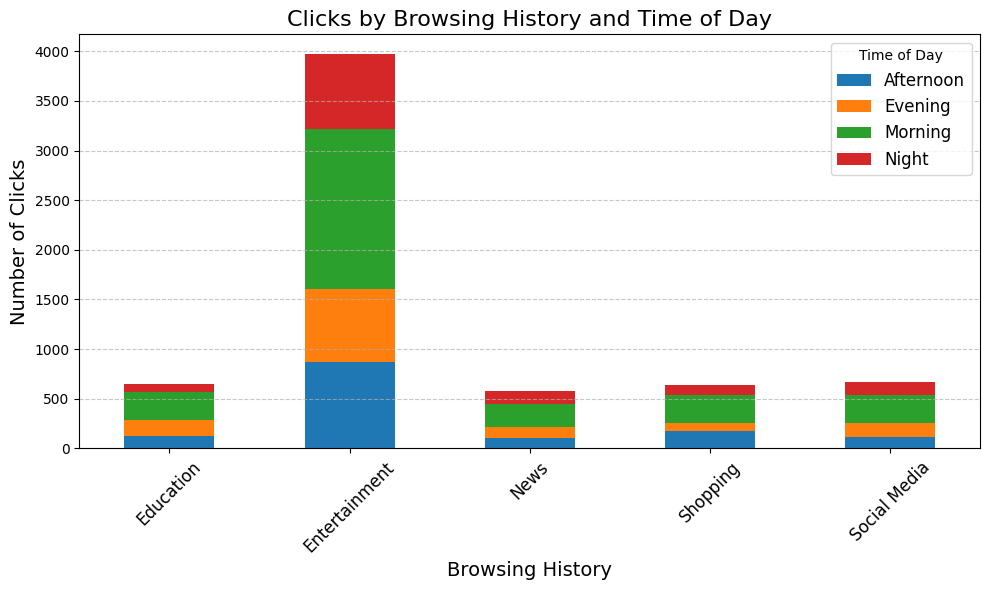

In [158]:
# Group by 'browsing_history' and 'time_of_day' and sum the clicks
history_times_click = ad_click.groupby(['browsing_history', 'time_of_day'])['click'].sum().unstack()

# Define a distinct color palette for four times
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

# Plot a stacked bar chart
history_times_click.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Add titles and labels
plt.title('Clicks by Browsing History and Time of Day', fontsize=16)
plt.xlabel('Browsing History', fontsize=14)
plt.ylabel('Number of Clicks', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Time of Day', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


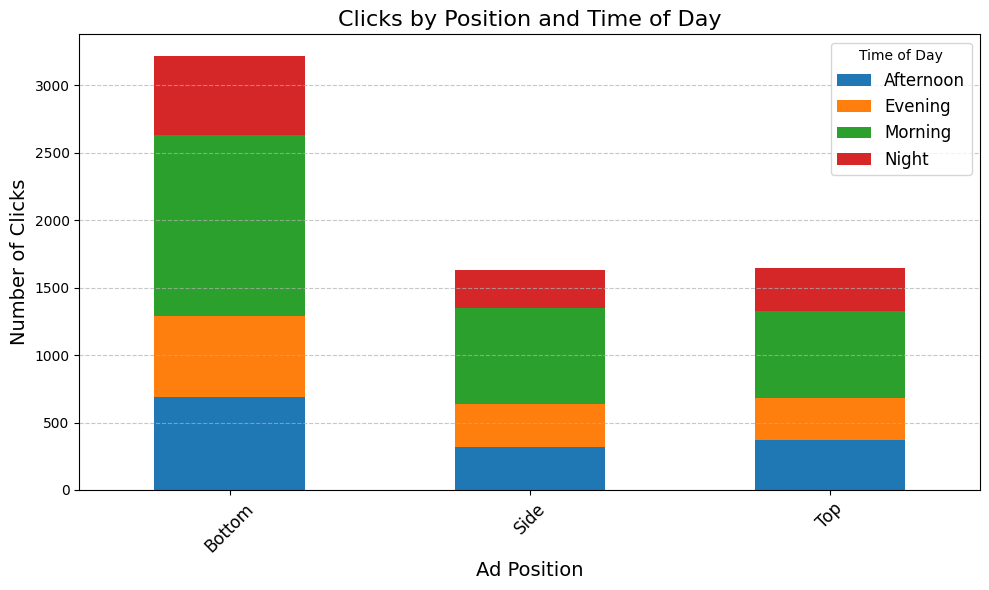

In [159]:
# Group by 'browsing_history' and 'time_of_day' and sum the clicks
position_times_click = ad_click.groupby(['ad_position', 'time_of_day'])['click'].sum().unstack()

# Define a distinct color palette for four times
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

# Plot a stacked bar chart
position_times_click.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Add titles and labels
plt.title('Clicks by Position and Time of Day', fontsize=16)
plt.xlabel('Ad Position', fontsize=14)
plt.ylabel('Number of Clicks', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Time of Day', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [160]:
'''
From the aggregate tables we realise the the morning have the highest number of clicks followed by afternoon, evening, night. We 
also have Enterntainment having the highest number of clicks. Following our graph. We have our insights as follows:
    - Webusers on the site with the entertainment browsing history are most likely to click our ad. Therefore our site should
    be targetted on the entertainment websites.
    - The best time to make our ad pop up on the website is mornings at the bottom.

Next we will build a simple keras sequential model. That can predict if an ad will be clicked or not depending on the position,
Time and Browsing History.
'''

'\nFrom the aggregate tables we realise the the morning have the highest number of clicks followed by afternoon, evening, night. We \nalso have Enterntainment having the highest number of clicks. Following our graph. We have our insights as follows:\n    - Webusers on the site with the entertainment browsing history are most likely to click our ad. Therefore our site should\n    be targetted on the entertainment websites.\n    - The best time to make our ad pop up on the website is mornings at the bottom.\n\nNext we will build a simple keras sequential model. That can predict if an ad will be clicked or not depending on the position,\nTime and Browsing History.\n'

In [161]:
#encode the data
ad_click_encoded = pd.get_dummies(ad_click, columns=['device_type', 'ad_position', 'browsing_history', 'time_of_day'], 
                                  drop_first=False)

print(ad_click_encoded)

       age      gender  click  device_type_Desktop  device_type_Mobile  \
0     22.0  Non-Binary      1                 True               False   
1     40.0        Male      1                 True               False   
2     41.0  Non-Binary      1                 True               False   
3     34.0        Male      1                 True               False   
4     39.0  Non-Binary      0                 True               False   
...    ...         ...    ...                  ...                 ...   
9995  40.0  Non-Binary      0                False                True   
9996  40.0      Female      0                 True               False   
9997  40.0        Male      0                False                True   
9998  40.0  Non-Binary      1                 True               False   
9999  44.0        Male      0                False               False   

      device_type_Tablet  ad_position_Bottom  ad_position_Side  \
0                  False               False 

In [162]:
#remove irrelevant features
ad_click_encoded = ad_click_encoded.drop(columns=['age', 'gender'], axis=1)

#split the data
X = ad_click_encoded.drop(columns= 'click', axis=1)  # Features
y = ad_click_encoded['click']  # Target column

# First, split into training+validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (6000, 15), Validation set: (2000, 15), Test set: (2000, 15)


In [163]:
# Instantiate the Sequential Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(8, activation='relu'),                                   # Hidden layer
    Dense(1, activation='sigmoid')                                # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics = ['accuracy']
            )

# Summary of the model
model.summary()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5298 - loss: 0.6887 - val_accuracy: 0.6405 - val_loss: 0.6549
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6554 - loss: 0.6438 - val_accuracy: 0.6405 - val_loss: 0.6511
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6525 - loss: 0.6424 - val_accuracy: 0.6420 - val_loss: 0.6503
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6554 - loss: 0.6397 - val_accuracy: 0.6420 - val_loss: 0.6486
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6594 - loss: 0.6364 - val_accuracy: 0.6420 - val_loss: 0.6483
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6593 - loss: 0.6361 - val_accuracy: 0.6420 - val_loss: 0.6478
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6453 - loss: 0.6429 - val_accuracy: 0.6420 - val_loss: 0.6482
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6592 - loss: 0.6341 - val_accuracy: 0

In [165]:
# End of notebook